K Means try to identify clusters of data points. 

Step 1: Choose the no. of clusters, 'k'.

Step 2: Select at random K points, that serve as centroids, which are not necessarily from your dataset.

Step 3: Assugn easch data point to the closest centroid, that forms K clusters.

Step 4: Compute and place the new centroid of each cluster.

Step 5: Perform step 3 again and then 4 (Iterative)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#lets take up the column 3, 4 for clustering.
x = df.iloc[:, [3, 4]].values

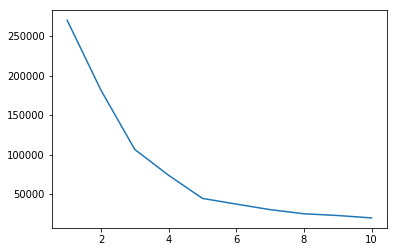

In [3]:
#using the elbow method to find the no. of clusters.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    reg = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    model = reg.fit(x)
    wcss.append(reg.inertia_)
plt.plot(range(1, 11), wcss)
#so we choose 5 clusters

In [4]:
#preparing model with 5 clusters 
reg = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
model = reg.fit(x)
y = model.predict(x)
pd.DataFrame(y).head()

,0
0,4
1,0
2,4
3,0
4,4


Now lets visualize the result. Note that predictions are not from 1-5 but from 0-4

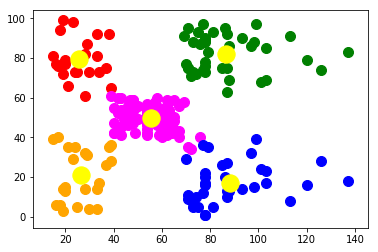

In [5]:
plt.scatter(x[y ==0, 0], x[y==0, 1], s = 100, color = 'red')
plt.scatter(x[y ==1, 0], x[y==1, 1], s = 100, color = 'magenta')
plt.scatter(x[y ==2, 0], x[y==2, 1], s = 100, color = 'green')
plt.scatter(x[y ==3, 0], x[y==3, 1], s = 100, color = 'blue')
plt.scatter(x[y ==4, 0], x[y==4, 1], s = 100, color = 'orange')
#for plotting the clusters centroids:
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, color = 'yellow')
